### Computer Vision and Convolutional Neural Networks in Tensorflow

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-07-03 03:39:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 

142.250.194.251, 142.250.195.27, 142.250.207.219, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.194.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  15.4MB/s    in 8.5s    

2024-07-03 03:39:42 (12.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls ../datasets/pizza_steak/

test  train


In [3]:
!ls ../datasets/pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [4]:
import os

for dirpath, dirnames, filenames in os.walk('../datasets/pizza_steak'):
    print(f"There are { len(dirnames) } directories and { len(filenames) } images in '{ dirpath }'")

There are 2 directories and 0 images in '../datasets/pizza_steak'
There are 2 directories and 0 images in '../datasets/pizza_steak/test'
There are 0 directories and 250 images in '../datasets/pizza_steak/test/steak'
There are 0 directories and 250 images in '../datasets/pizza_steak/test/pizza'
There are 2 directories and 0 images in '../datasets/pizza_steak/train'
There are 0 directories and 750 images in '../datasets/pizza_steak/train/steak'
There are 0 directories and 750 images in '../datasets/pizza_steak/train/pizza'


In [5]:
# Another way to find the nunmber of files
len(os.listdir('../datasets/pizza_steak/train/steak'))

750

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


SHAPE: (512, 512, 3)


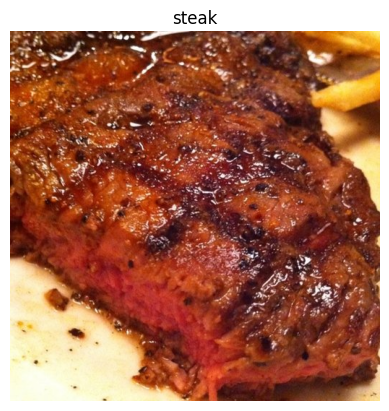

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #setup the target directory
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"SHAPE: {img.shape}")
    
    return img

img = view_random_image(target_dir="../datasets/pizza_steak/train/", target_class="steak")



In [8]:
import tensorflow as tf

tf.constant(img)

2024-07-03 03:39:48.134600: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-03 03:39:50.462119: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-03 03:39:53.573666: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-03 03:39:54.073108: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required li

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[122,  59,  18],
        [128,  65,  24],
        [128,  66,  25],
        ...,
        [255, 240, 138],
        [255, 240, 145],
        [255, 237, 143]],

       [[132,  69,  28],
        [130,  68,  27],
        [126,  64,  23],
        ...,
        [255, 240, 136],
        [255, 240, 142],
        [255, 239, 144]],

       [[136,  74,  35],
        [131,  69,  30],
        [124,  62,  23],
        ...,
        [255, 236, 131],
        [255, 236, 137],
        [255, 239, 142]],

       ...,

       [[253, 255, 233],
        [253, 255, 233],
        [253, 255, 231],
        ...,
        [251, 224, 145],
        [250, 223, 144],
        [251, 224, 145]],

       [[253, 255, 233],
        [253, 255, 233],
        [253, 255, 231],
        ...,
        [255, 228, 149],
        [252, 227, 147],
        [251, 226, 144]],

       [[253, 255, 233],
        [253, 255, 233],
        [253, 255, 231],
        ...,
        [252, 225, 14

In [9]:
img.shape

(512, 512, 3)

In [10]:
img = img/255.

### Normalizing image

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "../datasets/pizza_steak/train"
test_dir = "../datasets/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )

# Build a CNN model(same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/home/str/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/home/str/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-03 03:39:58.377760: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 63083520 exceeds 10% of free system memory.
2024-07-03 03:39:58.583147: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61952000 exceeds 10% of free system memory.
2024-07-03 03:39:59.022962: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28314720 exceeds 10% of free system memory.
2024-07-03 03:39:59.204521: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29393280 exceeds 10% of free system memory.
2024-07-03 03:39:59.394362: W exte

28/47 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5161 - loss: 0.6889

KeyboardInterrupt: 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### Using the same model as before

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 188ms/step - loss: 1.2821 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 242ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


SHAPE: (342, 512, 3)
SHAPE: (512, 512, 3)


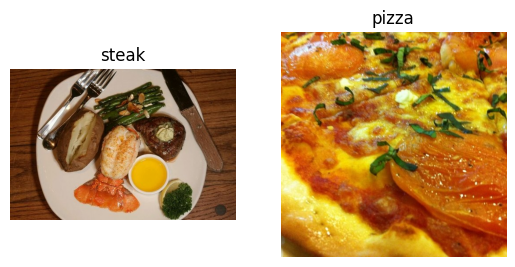

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(view_random_image(target_dir="../datasets/pizza_steak/train/", target_class="steak"))
plt.subplot(1, 2, 2)
plt.imshow(view_random_image(target_dir="../datasets/pizza_steak/train/", target_class="pizza"))

In [ ]:
train_dir = "../datasets/pizza_steak/train/"
test_dir = "../datasets/pizza_steak/test/"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="binary", batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224), class_mode="binary", batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()


    plt.figure()
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="validation accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

### New model

In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 189ms/step - loss: 0.6760 - accuracy: 0.6220 - val_loss: 0.5583 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.4889 - accuracy: 0.7640 - val_loss: 0.4188 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4701 - accuracy: 0.7860 - val_loss: 0.3907 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 0.4176 - accuracy: 0.8267 - val_loss: 0.3632 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.3856 - accuracy: 0.8360 - val_loss: 0.3291 - val_accuracy: 0.8720


In [ ]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

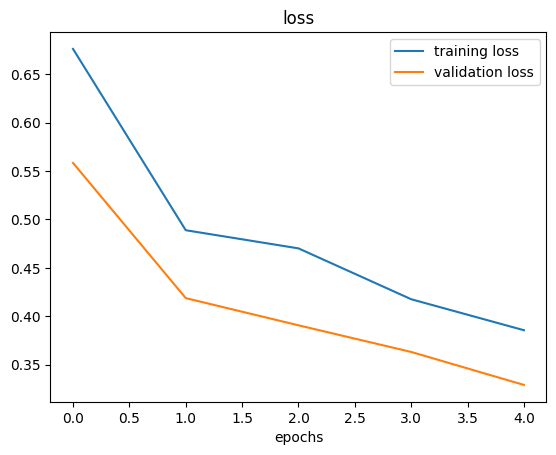

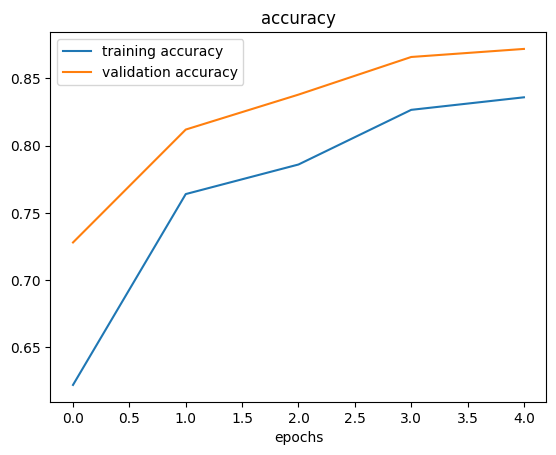

In [ ]:
plot_loss_curves(history_5)

### Data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.3, horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="binary", batch_size=32, shuffle=False)
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="binary", batch_size=32, shuffle=False)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224), class_mode="binary", batch_size=32)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Image number: 11


(-0.5, 223.5, 223.5, -0.5)

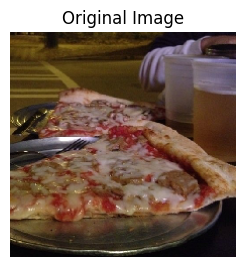

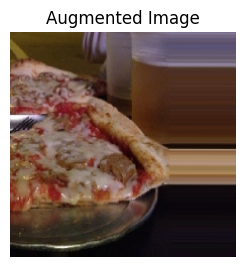

In [ ]:
import random
random_number = random.randint(0, 32)
print(f"Image number: {random_number}")
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(images[random_number])
plt.axis(False)



plt.figure()
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_images[random_number])
plt.axis(False)

### Model to use augmented data

In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented, steps_per_epoch=len(train_data_augmented), epochs=5, validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 58s 1s/step - loss: 0.7296 - accuracy: 0.5293 - val_loss: 0.6732 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 58s 1s/step - loss: 0.6933 - accuracy: 0.5280 - val_loss: 0.6548 - val_accuracy: 0.6260
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.6588 - accuracy: 0.6073 - val_loss: 0.5952 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 56s 1s/step - loss: 0.6879 - accuracy: 0.5607 - val_loss: 0.6066 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 82s 2s/step - loss: 0.6360 - accuracy: 0.6940 - val_loss: 0.4870 - val_accuracy: 0.8240


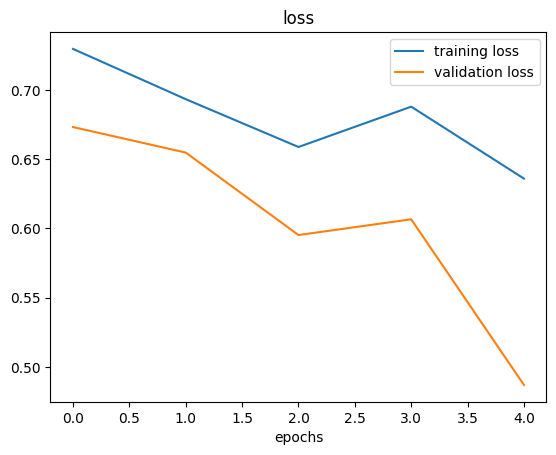

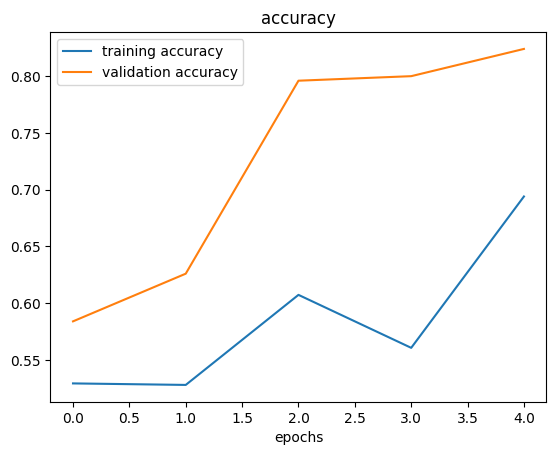

In [ ]:
plot_loss_curves(history_6)

### Shuffling the data to get more accuracy

In [ ]:


train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="binary", batch_size=32)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(20, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(30, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled, steps_per_epoch=len(train_data_augmented_shuffled), epochs=5, validation_data=test_data, validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 62s 1s/step - loss: 0.6352 - accuracy: 0.6327 - val_loss: 0.4891 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 71s 2s/step - loss: 0.5469 - accuracy: 0.7247 - val_loss: 0.3987 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 61s 1s/step - loss: 0.5065 - accuracy: 0.7613 - val_loss: 0.3835 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 60s 1s/step - loss: 0.4791 - accuracy: 0.7733 - val_loss: 0.3351 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 65s 1s/step - loss: 0.4580 - accuracy: 0.7867 - val_loss: 0.3111 - val_accuracy: 0.8660


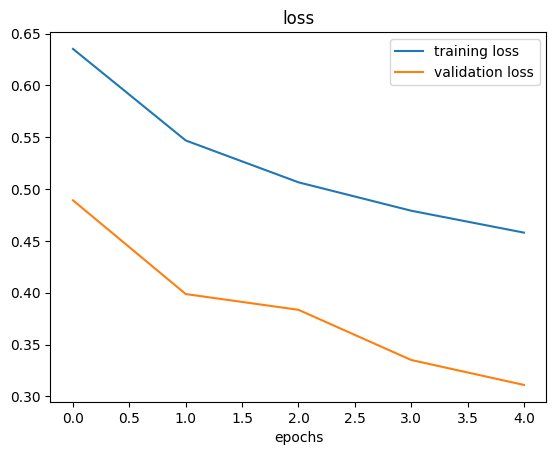

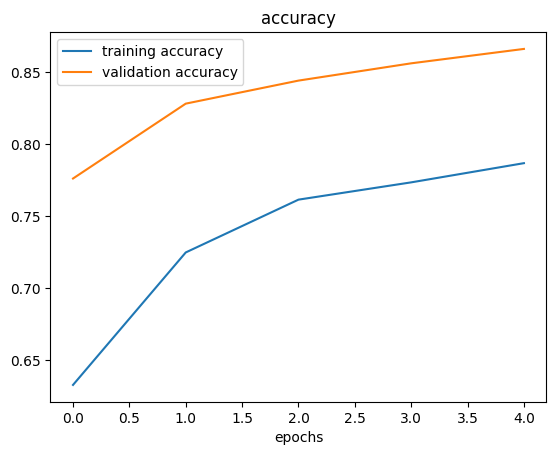

In [ ]:
plot_loss_curves(history_7)

### Inference

In [ ]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.
    return img

(-0.5, 1499.5, 999.5, -0.5)

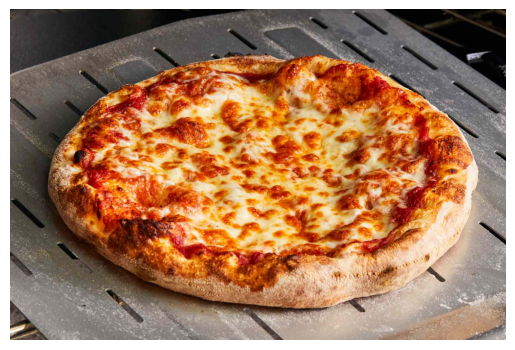

In [ ]:
inference_img = "../datasets/inference_img3.jpg"
steak = mpimg.imread(inference_img)
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak = load_and_prep_image(inference_img)

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 2s 2s/step


array([[0.01373462]], dtype=float32)

In [ ]:
class_names = ['pizza', 'steak']

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(pred))] 